<a href="https://colab.research.google.com/github/jaky1206/hypothyroidism_prediction_using_deep_learning/blob/main/Hypothyroidism_Prediction_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [63]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cse-6211-m-deep-learning-spring-2023/hypothyroid.csv")
display(df)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [64]:
df.describe().T


,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [66]:
df["binaryClass"].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [67]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})

In [68]:
df["pregnant"].value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

In [69]:
df=df.replace({"t":1,"f":0})

In [70]:
df["TBG"].value_counts()

?    3772
Name: TBG, dtype: int64

In [71]:
del df["TBG"]

In [72]:
df["referral source"].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [73]:
del df["referral source"]

In [74]:
df=df.replace({"?":np.NAN})

In [75]:
df=df.replace({"F":1,"M":0})

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [77]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
b

In [78]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [79]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [80]:
df['T4U measured'].fillna(df['T4U measured'].mean(), inplace=True)

In [81]:
df['sex'].fillna(df['sex'].mean(), inplace=True)

In [82]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [83]:
df['TSH'] = imputer.fit_transform(df[['TSH']])

In [84]:
df['T3'] = imputer.fit_transform(df[['T3']])

In [85]:
df['TT4'] = imputer.fit_transform(df[['TT4']])

In [86]:
df['T4U'] = imputer.fit_transform(df[['T4U']])

In [87]:
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [88]:
df.isnull().sum().sort_values(ascending = False)

age                          0
sex                          0
TBG measured                 0
FTI                          0
FTI measured                 0
T4U                          0
T4U measured                 0
TT4                          0
TT4 measured                 0
T3                           0
T3 measured                  0
TSH                          0
TSH measured                 0
psych                        0
hypopituitary                0
tumor                        0
goitre                       0
lithium                      0
query hyperthyroid           0
query hypothyroid            0
I131 treatment               0
thyroid surgery              0
pregnant                     0
sick                         0
on antithyroid medication    0
query on thyroxine           0
on thyroxine                 0
binaryClass                  0
dtype: int64

In [89]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.000000,1,1.140,1,109.000000,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.000000,0,0.995,0,110.469649,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.000000,1,0.910,1,120.000000,0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.000000,0,0.995,0,110.469649,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.000000,1,0.870,1,70.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,0,2.0135,0,108.319345,0,0.995,0,110.469649,0,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1,2.1000,1,124.000000,1,1.080,1,114.000000,0,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,1,1.8000,1,112.000000,1,1.070,1,105.000000,0,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,82.000000,1,0.940,1,87.000000,0,0


In [90]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

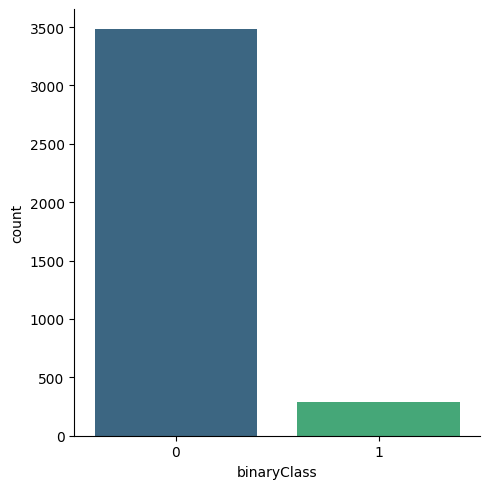

In [91]:
sns.catplot(x = 'binaryClass', kind = 'count', data = df, palette='viridis')

In [92]:
df['binaryClass'].value_counts()

0    3481
1     291
Name: binaryClass, dtype: int64

In [93]:
from sklearn.utils import resample
df_0 = df[df['binaryClass'] == 0]
df_1 = df[df['binaryClass'] == 1]

In [94]:
# apply resample
df_1_over_sampling = resample(df_1 , n_samples = 3481, replace = True, random_state = 123)

In [95]:
df_balanced = pd.concat([df_0, df_1_over_sampling])

In [96]:
df_balanced["binaryClass"].value_counts()

0    3481
1    3481
Name: binaryClass, dtype: int64

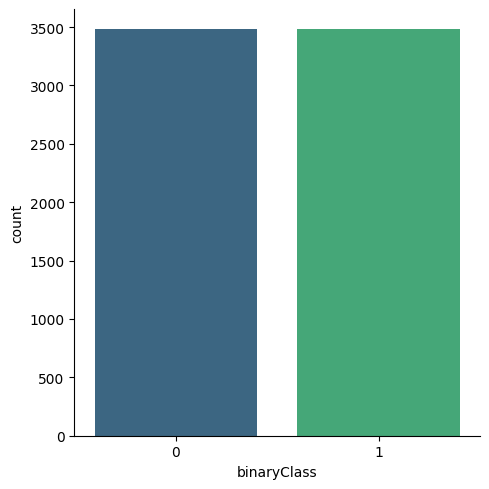

In [97]:
sns.catplot(x = 'binaryClass', kind = 'count', data = df_balanced, palette='viridis')

<Axes: >

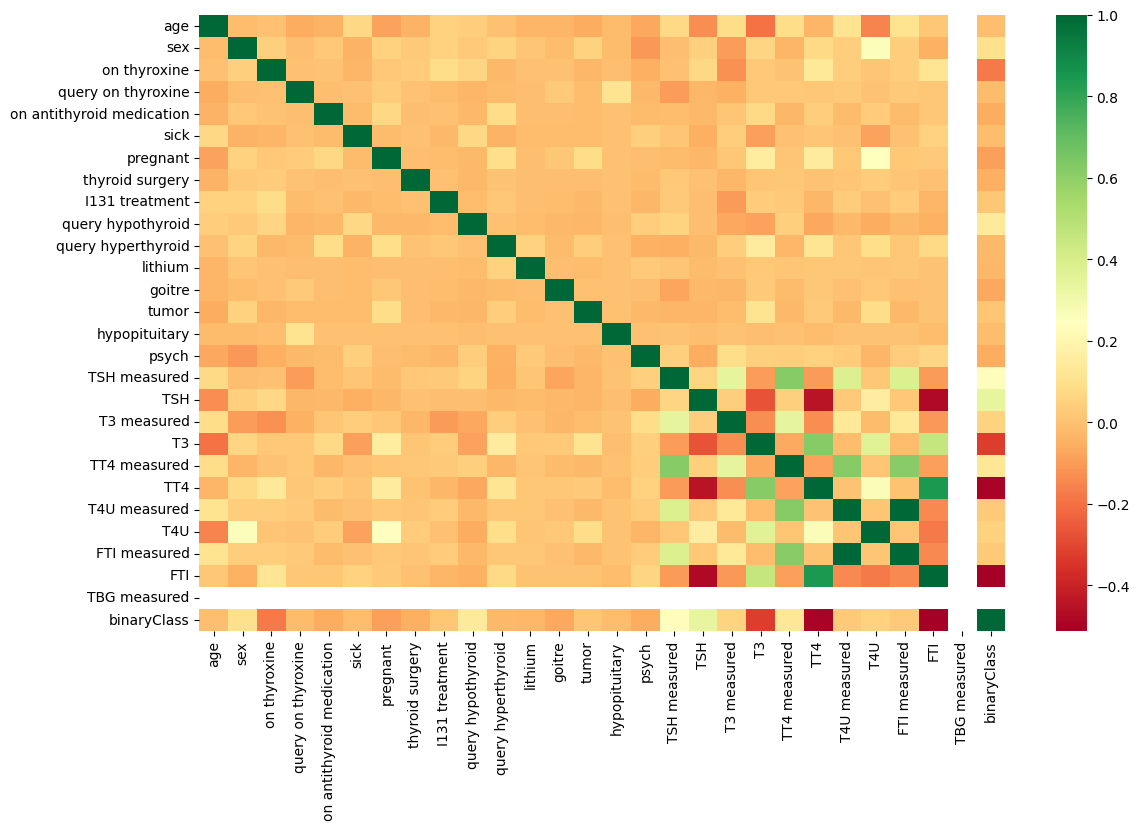

In [98]:
plt.figure(figsize=(13,8))
sns.heatmap(df_balanced.corr(), annot= False, cmap = 'RdYlGn')

In [99]:
X = df_balanced.drop(['binaryClass'], axis = 1)
y = df_balanced['binaryClass']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [101]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [102]:
def build_model():
    model = Sequential()

    # Input Layer
    model.add(Dense(units = 64, activation = 'relu', input_shape = [len(X.keys())]))
    model.add(Dropout(0.2))

    # Hidden Layer - I
    model.add(Dense(units = 128, activation= 'relu'))
    model.add(Dropout(0.2))

    # Hidden Layer - II
    model.add(Dense(units = 128, activation= 'relu'))
    model.add(Dropout(0.2))

    # Output Layer
    model.add(Dense(units = 1, activation='sigmoid'))
  
    # Optimizers 
    # Learning rate 'alpha' = (0.00001 - 0.1) 
    optimizers = Adam(learning_rate= 0.001)

    # Multiclass - categorical_crossentropy
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    
    return model

In [103]:
model = build_model()

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1792      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [105]:
history = model.fit(X_train, y_train, epochs = 500, batch_size= 25, validation_split = 0.2)

Epoch 1/500
156/156 [==============================] - 2s 4ms/step - loss: 1.3611 - accuracy: 0.6562 - val_loss: 0.4320 - val_accuracy: 0.7374
Epoch 2/500
156/156 [==============================] - 0s 3ms/step - loss: 0.5485 - accuracy: 0.7581 - val_loss: 0.2965 - val_accuracy: 0.9395
Epoch 3/500
156/156 [==============================] - 0s 3ms/step - loss: 0.3956 - accuracy: 0.8309 - val_loss: 0.2392 - val_accuracy: 0.8851
Epoch 4/500
156/156 [==============================] - 0s 3ms/step - loss: 0.2965 - accuracy: 0.8794 - val_loss: 0.1761 - val_accuracy: 0.9631
Epoch 5/500
156/156 [==============================] - 1s 4ms/step - loss: 0.2466 - accuracy: 0.9105 - val_loss: 0.1415 - val_accuracy: 0.9662
Epoch 6/500
156/156 [==============================] - 1s 5ms/step - loss: 0.2013 - accuracy: 0.9271 - val_loss: 0.1293 - val_accuracy: 0.9631
Epoch 7/500
156/156 [==============================] - 1s 5ms/step - loss: 0.1815 - accuracy: 0.9374 - val_loss: 0.1165 - val_accuracy: 0.9662

<Axes: >

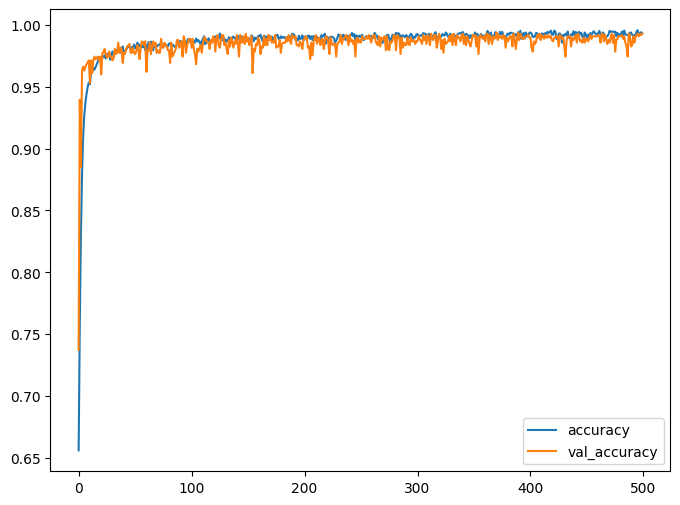

In [106]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize = (8,6))

In [107]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9923


[0.05638610199093819, 0.9923408031463623]

In [108]:
predict = model.predict(X_test)
yhat = np.round(predict)

66/66 [==============================] - 0s 1ms/step


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[1037,   16],
       [   0, 1036]])

<Axes: >

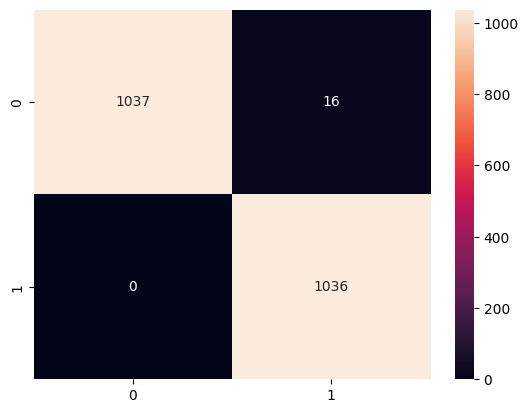

In [111]:
sns.heatmap(confusion_matrix(y_test, yhat), annot = True, fmt='g')